In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas import Series, DataFrame
from pylab import *
import seaborn as sns


In [10]:
data = pd.read_csv('ks-projects-201801.csv')

In [18]:
pd.options.display.max_rows = 30

In [12]:
print(data.shape)

(378661, 15)


In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


In [14]:
data.nunique()

ID                  378661
name                375764
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            378089
pledged              62130
state                    6
backers               3963
country                 23
usd pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64

In [15]:
data.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [10]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [11]:
data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [12]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], dtype='object')

In [13]:
columns_int = ['name', 'category', 'goal', 'pledged']

In [14]:
col_data = data[columns_int]
col_data.head()

,name,category,goal,pledged
0,The Songs of Adelaide & Abullah,Poetry,1000.0,0.0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,30000.0,2421.0
2,Where is Hank?,Narrative Film,45000.0,220.0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,5000.0,1.0
4,Community Film Project: The Art of Neighborhoo...,Film & Video,19500.0,1283.0


In [15]:
col_data

,name,category,goal,pledged
0,The Songs of Adelaide & Abullah,Poetry,1000.0,0.0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,30000.0,2421.0
2,Where is Hank?,Narrative Film,45000.0,220.0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,5000.0,1.0
4,Community Film Project: The Art of Neighborhoo...,Film & Video,19500.0,1283.0
...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,50000.0,25.0
378657,The Tribe,Narrative Film,1500.0,155.0
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,15000.0,20.0
378659,BioDefense Education Kit,Technology,15000.0,200.0


In [16]:
values_col = [ 'backers', 'usd_pledged_real', 'usd_goal_real']
values_data = data[values_col]
values_data.describe()

,backers,usd_pledged_real,usd_goal_real
count,378661.000000,3.786610e+05,3.786610e+05
mean,105.617476,9.058924e+03,4.545440e+04
std,907.185035,9.097334e+04,1.152950e+06
min,0.000000,0.000000e+00,1.000000e-02
25%,2.000000,3.100000e+01,2.000000e+03
50%,12.000000,6.243300e+02,5.500000e+03
75%,56.000000,4.050000e+03,1.550000e+04
max,219382.000000,2.033899e+07,1.663614e+08


In [17]:
plt.rc('figure', figsize=(15, 8))

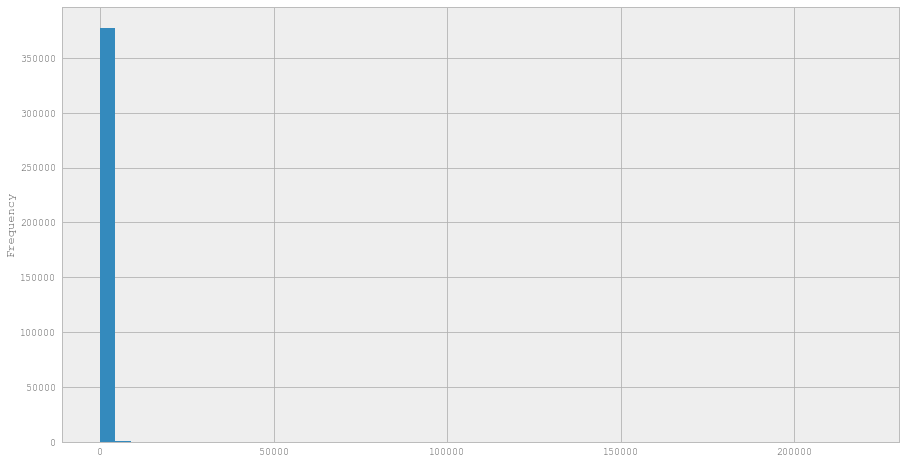

In [19]:
data['backers'].plot.hist(bins=50)
show()

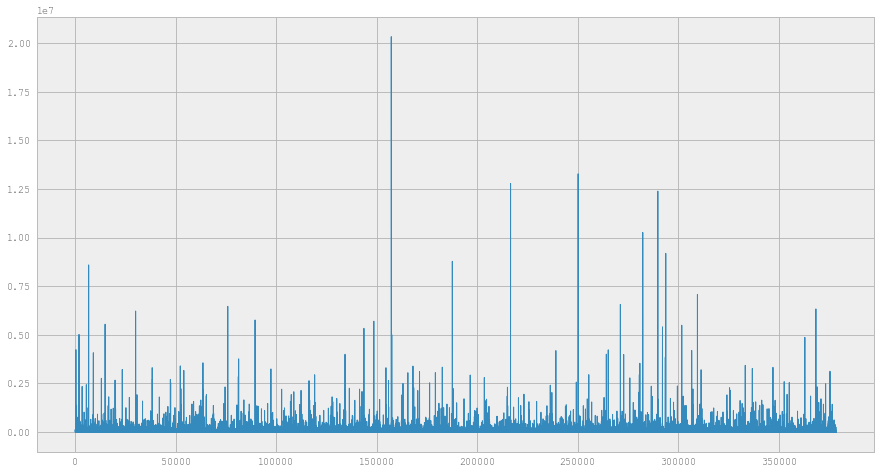

In [20]:
plt.plot(data['usd_pledged_real'])
show()

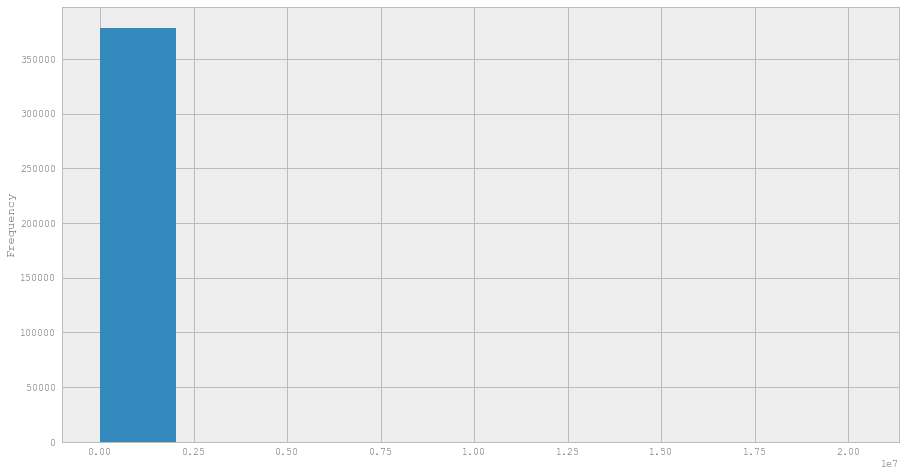

In [21]:
data['usd_pledged_real'].plot.hist(bins=10)
show()

In [22]:
pd.options.display.max_rows = 20

In [23]:
main_category = data['main_category']
main_category.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [24]:
category = data['category']
category.value_counts()

Product Design     22314
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
Video Games        11830
Food               11493
Film & Video       10108
Fiction             9169
Fashion             8554
                   ...  
Embroidery           113
Typography           108
Pottery              100
Weaving               93
Quilts                81
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: int64

In [25]:
state = data['state']
state_count = state.value_counts()
state_count

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [38]:
state_count / len(data)

failed        0.522153
successful    0.353762
canceled      0.102411
undefined     0.009407
live          0.007392
suspended     0.004875
Name: state, dtype: float64

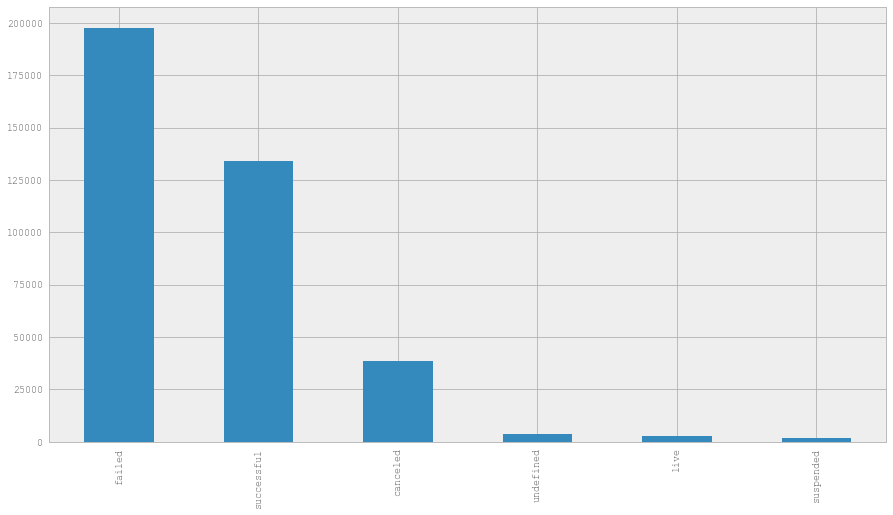

In [26]:
state_count.plot(kind='bar')
show()

In [27]:
data[data.state == 'canceled']

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00
68,1000256760,"Raise the Woof, expanding the love (Canceled)",Design,Design,CAD,2015-08-07,15000.0,2015-07-08 21:46:53,700.00,canceled,6,CA,553.32,535.09,11466.14
70,1000260691,Gizbee™ Unlimited Removable Storage for Your T...,Gadgets,Technology,USD,2016-03-25,87000.0,2016-02-29 20:30:27,2030.00,canceled,15,US,2030.00,2030.00,87000.00
73,1000278154,"Loot and Recruit - A quirky, combative, deck b...",Tabletop Games,Games,USD,2015-04-10,13000.0,2015-03-10 13:19:18,2453.00,canceled,65,US,2453.00,2453.00,13000.00
74,1000282287,Babe Ruth's Family Kitchen - Gourmet Hot Dogs ...,Food,Food,USD,2015-10-13,25000.0,2015-09-08 00:59:36,0.00,canceled,0,US,0.00,0.00,25000.00
93,10003650,Glyscian Debut Album Recording (Canceled),Rock,Music,USD,2012-05-26,15000.0,2012-03-27 04:25:46,151.00,canceled,4,US,151.00,151.00,15000.00
104,1000427280,Fishtacular - The Ultimate Fishing Tool (Cance...,Apps,Technology,CAD,2015-05-25,50000.0,2015-04-23 20:04:12,11336.00,canceled,19,CA,9240.74,9110.34,40183.24
184,1000767040,Strait Jacket – Tangle Prevention For Headphones,Product Design,Design,USD,2016-11-23,30000.0,2016-10-24 03:35:51,1041.00,canceled,46,US,549.00,1041.00,30000.00


In [28]:
data[data.state == 'canceled'][data.pledged > data.goal]

C:\Users\Jimena\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
494,1002379225,"The World's First Genuine, Intuitively-control...",Technology,Technology,USD,2017-06-15,5000.0,2017-05-01 18:37:51,61416.0,canceled,103,US,13700.00,61416.00,5000.00
590,1002854072,Spycup turns your iPhone into a hidden camera ...,Gadgets,Technology,CAD,2015-12-19,5000.0,2015-11-19 17:26:34,6672.0,canceled,115,CA,5006.57,4810.38,3604.90
720,1003500859,I Can't Believe It's Not Potato Salad ! (Cance...,Cookbooks,Food,GBP,2014-08-10,10.0,2014-07-11 13:35:05,12.0,canceled,3,GB,20.59,20.03,16.69
764,100372771,A Big Dream of a Little Man - Alex Oddman's De...,Music,Music,USD,2017-01-19,1.0,2016-12-20 22:01:21,7.0,canceled,1,US,7.00,7.00,1.00
1810,1009260867,"Rude Story Cards. An easy, fun & outrageous pa...",Tabletop Games,Games,CAD,2016-10-14,100.0,2016-08-15 19:16:59,121.0,canceled,4,CA,165.99,91.90,75.95
3464,1017833132,"Dungeon in a Box - Your Monthly Dungeon Crawl,...",Tabletop Games,Games,USD,2017-12-05,4000.0,2017-11-09 18:55:53,54438.0,canceled,358,US,15424.00,54438.00,4000.00
3489,1017975172,Lecan I/O - The iPhone Dock Reinvented,Product Design,Design,USD,2017-05-18,12000.0,2017-04-04 18:05:09,18704.0,canceled,54,US,19121.00,18704.00,12000.00
4401,102254016,GameMate: The universal electronic dice and ga...,Tabletop Games,Games,USD,2016-10-01,5000.0,2016-08-25 18:49:14,9418.0,canceled,155,US,9227.00,9418.00,5000.00
4748,102414959,Help us relocate Carmel Pop Shop Popcorn to We...,Small Batch,Food,USD,2017-01-21,3000.0,2017-01-06 19:23:13,3062.0,canceled,28,US,710.00,3062.00,3000.00
5019,1025654402,THE SMOG RIDERS Dimensions of Madness,Tabletop Games,Games,EUR,2017-11-03,35000.0,2017-10-10 18:01:02,41684.0,canceled,502,ES,29071.06,48591.25,40799.67


There are 650 projects which pledged more than goal. Technically they are succesful. It's a 1.7% of the total.

In [16]:
currency = data['currency']
currency_count = currency.value_counts()
currency_count

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [19]:
country = data['country']
country_count = country.value_counts()
country_count

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [20]:
data[data.country == 'N,0"']

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
824,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",NaN,4251.14,3572.39
844,1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",NaN,6370.00,5000.00
864,1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",NaN,6695.00,6000.00
870,1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",NaN,2926.00,2750.00
890,1004402863,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,1200.0,2015-11-11 21:02:55,1585.00,undefined,0,"N,0""",NaN,1585.00,1200.00
